## Data Science capstone project - setting up an Indian restaurant in Chennai

One of the most busiest and popular cities of India is Chennai, situated in Tamil Nadu. It is the land of many industrial and IT sectors. Chennai is the most densely populated city in Tamil Nadu with a density of 26,553 people per square kilometers.
    
The main goal of this project is to identify restaurant demographics in Chennai to open an Indian restaurant. In order to find an optimal neighborhood, we have to explore the neighborhoods of Chennai and shortlist the neighbourhoods which are frequently visiting Indian restaurants. The shortlisting should also be based on surrounding places in shortlisted neighborhoods in addition to presence of Indian restaurants.

The following data sources will be needed to extract/generate the required information:

- List of all neighborhoods in Chennai  [https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai](https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Chennai)
- Number of restaurants and their type and location in every neighbourhood - **Foursquare API**  [https://developer.foursquare.com](https://developer.foursquare.com)

#### creating pandas dataframe

In [5]:
import pandas as pd
df=pd.read_excel('Geospatial_Coordinates.xlsx')
df.head(10)

,City,Neighborhood,Latitude,Longitude
0,Chennai,Adyar,13.006300,80.257400
1,Chennai,Alandur,13.003000,80.204000
2,Chennai,Alwarpet,13.033900,80.248600
3,Chennai,Ashok Nagar,13.035100,80.209500
4,Chennai,Besant Nagar,13.000200,80.266800
5,Chennai,Chrompet,12.951610,80.140970
6,Chennai,Egmore,13.078000,80.259000
7,Chennai,Guindy,13.008413,80.212688
8,Chennai,Karapakkam,12.914136,80.229285
9,Chennai,Kotturpuram,13.019600,80.245800


#### Create a map of Chennai with neighborhoods superimposed on top

In [6]:
import folium
import numpy as np
latitude=13.0827
longitude=80.2707

# create map of Toronto using latitude and longitude values
map_chennai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, neighborhood in zip(df['Latitude'], df['Longitude'], df['City'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
    
map_chennai

#### Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'ATF405FX3US1FJQQKPUQA44XXMCFDCPZPNPB1SPJVVYT3JIZ' 
CLIENT_SECRET = 'XBVVGNC25DBP3AUSFVIID0201CV2QMWCXM0ITWL4FFHT1K0Y' 
VERSION = '20191010' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ATF405FX3US1FJQQKPUQA44XXMCFDCPZPNPB1SPJVVYT3JIZ
CLIENT_SECRET:XBVVGNC25DBP3AUSFVIID0201CV2QMWCXM0ITWL4FFHT1K0Y


In [8]:
import json
from pandas.io.json import json_normalize
import requests

#### Explore Neighborhoods in Chennai

In [9]:
LIMIT=100
radius=500
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
chennai_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Adyar
Alandur
Alwarpet
Ashok Nagar
Besant Nagar
Chrompet
Egmore
Guindy
Karapakkam
Kotturpuram
Koyambedu
Madipakkam
Mylapore
Velachery
Royapuram
Sholinganallur
T.Nagar
Saidapet
Nungampakkam
Kodampakkam


In [11]:
print(chennai_venues.shape)
chennai_venues.head()

(224, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adyar,13.0063,80.2574,Bombay Brassiere,13.006961,80.256419,North Indian Restaurant
1,Adyar,13.0063,80.2574,Cool Biz,13.006632,80.257275,Juice Bar
2,Adyar,13.0063,80.2574,McDonald's,13.006632,80.254255,Fast Food Restaurant
3,Adyar,13.0063,80.2574,Prems Graama Bhojanam,13.006345,80.253995,Vegetarian / Vegan Restaurant
4,Adyar,13.0063,80.2574,Adyar Ananda Bhavan,13.005824,80.257368,Indian Restaurant


In [12]:
chennai_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adyar,34,34,34,34,34,34
Alandur,4,4,4,4,4,4
Alwarpet,26,26,26,26,26,26
Ashok Nagar,11,11,11,11,11,11
Besant Nagar,23,23,23,23,23,23
Chrompet,9,9,9,9,9,9
Egmore,7,7,7,7,7,7
Guindy,4,4,4,4,4,4
Karapakkam,4,4,4,4,4,4


In [13]:
print('There are {} unique categories.'.format(len(chennai_venues['Venue Category'].unique())))

There are 72 unique categories.


In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Analyze Each Neighborhood

In [15]:
# one hot encoding
chennai_onehot = pd.get_dummies(chennai_venues[['Venue Category']], prefix="", prefix_sep="")
chennai_onehot['Neighborhood']=chennai_venues['Neighborhood']
fixed_columns = [chennai_onehot.columns[-1]] + list(chennai_onehot.columns[:-1])
chennai_onehot = chennai_onehot[fixed_columns]
chennai_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Asian Restaurant,Bakery,Bar,Beach,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant,Fish Market,Flower Shop,Food,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Pharmacy,Pizza Place,Pool Hall,Ramen Restaurant,Restaurant,Road,Rock Club,Sandwich Place,Sculpture Garden,Shoe Store,Snack Place,South Indian Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [16]:
chennai_grouped = chennai_onehot.groupby('Neighborhood').mean().reset_index()
chennai_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Arcade,Asian Restaurant,Bakery,Bar,Beach,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant,Fish Market,Flower Shop,Food,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Pharmacy,Pizza Place,Pool Hall,Ramen Restaurant,Restaurant,Road,Rock Club,Sandwich Place,Sculpture Garden,Shoe Store,Snack Place,South Indian Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Adyar,0.000000,0.000000,0.00,0.029412,0.029412,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.00,0.000000,0.029412,0.000000,0.000000,0.088235,0.000000,0.000000,0.000000,0.029412,0.000000,0.058824,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.029412,0.000000,0.029412,0.000000,0.00,0.029412,0.264706,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.0,0.029412,0.000000,0.000000,0.000000,0.058824,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000
1,Alandur,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alwarpet,0.000000,0.000000,0.00,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.038462,0.00,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.00,0.000000,0.153846,0.076923,0.115385,0.000000,0.000000,0.000000,0.000000,0.115385,0.000000,0.038462,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.038462,0.000000,0.00,0.038462,0.00,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.076923,0.000000,0.000000,0.000000,0.000000
3,Ashok Nagar,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,0.00,0.090909,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000
4,Besant Nagar,0.000000,0.043478,0.00,0.000000,0.000000,0.043478,0.000000,0.043478,0.086957,0.000000,0.000000,0.043478,0.00,0.000000,0.043478,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.173913,0.173913,0.043478,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0

#### Let's print each neighborhood along with the top 5 most common venues

In [17]:
num_top_venues = 5

for hood in chennai_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chennai_grouped[chennai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar----
                     venue  freq
0        Indian Restaurant  0.26
1              Coffee Shop  0.09
2  North Indian Restaurant  0.06
3        Electronics Store  0.06
4           Ice Cream Shop  0.03


----Alandur----
               venue  freq
0  Indian Restaurant  0.25
1          Hotel Bar  0.25
2              Hotel  0.25
3        Fish Market  0.25
4        Men's Store  0.00


----Alwarpet----
                 venue  freq
0    Indian Restaurant  0.15
1  Japanese Restaurant  0.12
2               Lounge  0.12
3   Italian Restaurant  0.08
4                Hotel  0.08


----Ashok Nagar----
                  venue  freq
0     Indian Restaurant  0.18
1  Fast Food Restaurant  0.18
2      Sculpture Garden  0.09
3         Movie Theater  0.09
4           Pizza Place  0.09


----Besant Nagar----
               venue  freq
0     Ice Cream Shop  0.17
1  Indian Restaurant  0.17
2          Juice Bar  0.09
3             Bistro  0.09
4        Snack Place  0.04


----Chrompet----
         

#### Let's put that into a *pandas* dataframe

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chennai_grouped['Neighborhood']

for ind in np.arange(chennai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chennai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Coffee Shop,North Indian Restaurant,Electronics Store,Movie Theater,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Ice Cream Shop,Italian Restaurant
1,Alandur,Hotel Bar,Hotel,Fish Market,Indian Restaurant,Gym,Grocery Store,Gourmet Shop,Gift Shop,Food,Flower Shop
2,Alwarpet,Indian Restaurant,Lounge,Japanese Restaurant,Restaurant,Thai Restaurant,Hotel,Italian Restaurant,Pizza Place,Burger Joint,South Indian Restaurant
3,Ashok Nagar,Indian Restaurant,Fast Food Restaurant,Movie Theater,Diner,Vegetarian / Vegan Restaurant,Metro Station,Café,Sculpture Garden,Pizza Place,Convenience Store
4,Besant Nagar,Ice Cream Shop,Indian Restaurant,Juice Bar,Bistro,New American Restaurant,Beach,Coffee Shop,Chinese Restaurant,Café,Burger Joint


#### Cluster Neighborhoods

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

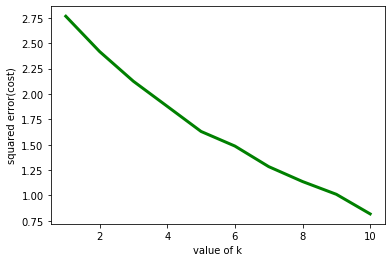

In [21]:
chennai_grouped_clustering = chennai_grouped.drop('Neighborhood', 1)
cost=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, random_state=0).fit(chennai_grouped_clustering)
    cost.append(km.inertia_)
plt.plot(range(1,11), cost, color='g', linewidth='3')
plt.xlabel("value of k")
plt.ylabel("squared error(cost)")
plt.show()

the value of k=5 is chosen using elbow method

In [22]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chennai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 0, 0, 0, 0, 0, 3, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [23]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chennai_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chennai_merged = chennai_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chennai_merged.head()

,City,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chennai,Adyar,13.0063,80.2574,0,Indian Restaurant,Coffee Shop,North Indian Restaurant,Electronics Store,Movie Theater,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Ice Cream Shop,Italian Restaurant
1,Chennai,Alandur,13.0030,80.2040,3,Hotel Bar,Hotel,Fish Market,Indian Restaurant,Gym,Grocery Store,Gourmet Shop,Gift Shop,Food,Flower Shop
2,Chennai,Alwarpet,13.0339,80.2486,0,Indian Restaurant,Lounge,Japanese Restaurant,Restaurant,Thai Restaurant,Hotel,Italian Restaurant,Pizza Place,Burger Joint,South Indian Restaurant
3,Chennai,Ashok Nagar,13.0351,80.2095,0,Indian Restaurant,Fast Food Restaurant,Movie Theater,Diner,Vegetarian / Vegan Restaurant,Metro Station,Café,Sculpture Garden,Pizza Place,Convenience Store
4,Chennai,Besant Nagar,13.0002,80.2668,0,Ice Cream Shop,Indian Restaurant,Juice Bar,Bistro,New American Restaurant,Beach,Coffee Shop,Chinese Restaurant,Café,Burger Joint


Finally, let's visualize the resulting clusters

In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chennai_merged['Latitude'], chennai_merged['Longitude'], chennai_merged['Neighborhood'], chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### cluster 1

In [25]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 0, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Coffee Shop,North Indian Restaurant,Electronics Store,Movie Theater,Grocery Store,Gym / Fitness Center,Fast Food Restaurant,Ice Cream Shop,Italian Restaurant
2,Alwarpet,Indian Restaurant,Lounge,Japanese Restaurant,Restaurant,Thai Restaurant,Hotel,Italian Restaurant,Pizza Place,Burger Joint,South Indian Restaurant
3,Ashok Nagar,Indian Restaurant,Fast Food Restaurant,Movie Theater,Diner,Vegetarian / Vegan Restaurant,Metro Station,Café,Sculpture Garden,Pizza Place,Convenience Store
4,Besant Nagar,Ice Cream Shop,Indian Restaurant,Juice Bar,Bistro,New American Restaurant,Beach,Coffee Shop,Chinese Restaurant,Café,Burger Joint
5,Chrompet,Indian Restaurant,Clothing Store,Light Rail Station,Train Station,Ice Cream Shop,Bakery,Movie Theater,Road,Cosmetics Shop,Department Store
6,Egmore,Indian Restaurant,Pizza Place,Italian Restaurant,Café,Diner,Yoga Studio,Fabric Shop,Department Store,Dessert Shop,Electronics Store
7,Guindy,Indian Restaurant,Bar,Pool Hall,Bus Line,Yoga Studio,Fast Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store
13,Velachery,Indian Restaurant,Fast Food Restaurant,Department Store,Chinese Restaurant,Restaurant,Accessories Store,Kerala Restaurant,Gift Shop,Multiplex,Juice Bar
15,Sholinganallur,Hotel,Restaurant,Middle Eastern Restaurant,Indian Restaurant,Food,Sandwich Place,Cosmetics Shop,Department Store,Dessert Shop,Diner
19,Kodampakkam,Yoga Studio,Juice Bar,Department Store,Lounge,Gym / Fitness Center,Indian Restaurant,Grocery Store,Gift Shop,Food,Gourmet Shop


#### cluster 2

In [26]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 1, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Kotturpuram,Department Store,Bakery,Chinese Restaurant,Café,Market,Rock Club,Flower Shop,Asian Restaurant,South Indian Restaurant,Indian Restaurant
10,Koyambedu,Flower Shop,Department Store,Antique Shop,Bus Station,Fish Market,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant
12,Mylapore,Vegetarian / Vegan Restaurant,Cosmetics Shop,Clothing Store,Indian Restaurant,Jewelry Store,Juice Bar,Fast Food Restaurant,Department Store,Dessert Shop,Diner
16,T.Nagar,Clothing Store,Miscellaneous Shop,South Indian Restaurant,Asian Restaurant,Shoe Store,Fabric Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner
17,Saidapet,Bus Station,Fish Market,Train Station,South Indian Restaurant,Indian Restaurant,Movie Theater,Fabric Shop,Cosmetics Shop,Department Store,Dessert Shop
18,Nungampakkam,Train Station,Chinese Restaurant,Ice Cream Shop,Department Store,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Clothing Store,Women's Store,South Indian Restaurant


#### cluster 3

In [27]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 2, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Royapuram,Convenience Store,Fabric Shop,Fast Food Restaurant,Women's Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Yoga Studio


#### cluster 4

In [28]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 3, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alandur,Hotel Bar,Hotel,Fish Market,Indian Restaurant,Gym,Grocery Store,Gourmet Shop,Gift Shop,Food,Flower Shop
8,Karapakkam,Indian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop


#### cluster 5

In [29]:
chennai_merged.loc[chennai_merged['Cluster Labels'] == 4, chennai_merged.columns[[1] + list(range(5, chennai_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Madipakkam,Grocery Store,Pharmacy,Pizza Place,Coffee Shop,Yoga Studio,Electronics Store,Cosmetics Shop,Department Store,Dessert Shop,Diner


Creating a data frame grouped by clusters by taking the mean of the frequency of occurrence of each venue category

In [30]:
chn_results = pd.DataFrame(kmeans.cluster_centers_)
chn_results.columns = chennai_grouped_clustering.columns
chn_results.index = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5']
chn_results['Total Sum'] = chn_results.sum(axis = 1)
chn_results

,Accessories Store,American Restaurant,Antique Shop,Arcade,Asian Restaurant,Bakery,Bar,Beach,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant,Fish Market,Flower Shop,Food,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Light Rail Station,Lounge,Market,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Pharmacy,Pizza Place,Pool Hall,Ramen Restaurant,Restaurant,Road,Rock Club,Sandwich Place,Sculpture Garden,Shoe Store,Snack Place,South Indian Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio,Total Sum
Cluster1,0.002857,4.347826e-03,1.734723e-18,0.002941,0.002941,0.022246,0.027857,4.347826e-03,8.695652e-03,0.002941,0.003846,0.008194,2.500000e-02,3.469447e-18,0.030666,0.013908,0.011111,0.016028,0.000000e+00,-1.734723e-18,0.020000,0.005798,0.023377,0.008739,0.000000e+00,0.032552,0.00000,0.000000,1.666667e-02,0.002857,0.002941,0.017227,0.002857,1.722689e-02,2.435897e-02,1.734723e-18,0.034301,0.209889,0.029267,0.011538,-1.734723e-18,0.02878,0.002857,0.011111,0.028765,0.000000,0.003846,0.009091,1.666667e-02,0.000000,0.023143,0.002857,4.347826e-03,0.003846,0.005882,1.734723e-18,0.044366,2.500000e-02,0.002857,0.030073,0.011111,0.002941,0.021014,0.009091,0.002857,1.014615e-02,0.003846,0.007692,0.011111,0.014889,0.000000,0.014286,1.0
Cluster2,0.000000,4.336809e-19,4.166667e-02,0.000000,0.047222,0.013889,0.000000,4.336809e-19,8.673617e-19,0.000000,0.000000,0.000000,1.734723e-18,8.928571e-02,0.013889,0.027778,0.071032,0.000000,3.469447e-18,2.380952e-02,0.083333,0.000000,0.000000,0.000000,3.469447e-18,0.013889,0.02381,0.055556,1.734723e-18,0.000000,0.000000,0.013889,0.000000,1.734723e-18,6.938894e-18,1.734723e-18,0.013889,0.075397,0.013889,0.000000,2.380952e-02,0.02381,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,1.734723e-18,0.033333,0.023810,0.000000,4.336809e-19,0.000000,0.000000,1.734723e-18,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.033333,8.673617e-19,0.084921,0.000000,0.051587,0.061508,0.013889,0.000000,1.0
Cluster3,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.333333e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.333333e-01,0.333333,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
Cluster4,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.12500,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.500000e-01,1.250000e-01,0.000000,0.375000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,1.0
Cluster5,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0

#### Visualizing Top 10 Venues for each Cluster

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Function to generate a horizontal bar plot showing the top 10 venues for each cluster, highlighting the food venues

In [32]:
def generate_plot(clus,i):
    
    plt.style.use('default')

    tags=['Restaurant','Coffee','Food','Pizza','Sandwich']
    colors = []
    for value in clus.index: 
        if  any(t in value for t in tags):
            colors.append('#0000FF')
        else:            
            colors.append('#FF0000')

    ax=clus.plot(kind='barh', figsize=(16,8), color=colors, alpha=0.7)

    plt.title('(in % of all venues)\n')
    ax.title.set_fontsize(14)
    plt.suptitle('Ten Most Prevalent Venues of Cluster {}'.format(i), fontsize=16)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    plt.xticks([])
    ax.tick_params(axis ='both', which ='both', length = 0)
    labels = [(item.get_text()+'  ') for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)

    for label in (ax.get_yticklabels()):
        label.set_fontsize(12)

    for index, value in enumerate(clus): 
        label = "%.1f " % round(value*100,1) + "%"
        # place text at the end of bar (adding 0.001 to x, and 0.1 from y to make it appear just after the bar)
        plt.annotate(label, xy=(value + 0.001, index - 0.1), color='black',fontsize=12)

    legend_elements = [Patch(facecolor='#0000FF', edgecolor='#0000FF',
                             label='Food Venues',alpha=0.7),
                       Patch(facecolor='#FF0000', edgecolor='#FF0000',
                             label='Others',alpha=0.7)]

    ax.legend(handles=legend_elements, loc='best',fontsize=12)

    plt.show()

#### cluster 1

,Indian Restaurant,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Café,Restaurant,Italian Restaurant,Juice Bar,Lounge,Bar,Bus Line,Pool Hall,Hotel,Diner,Movie Theater,Bakery,Sandwich Place,Department Store,Gym / Fitness Center,Grocery Store,Middle Eastern Restaurant,Food,Coffee Shop,Vegetarian / Vegan Restaurant,Yoga Studio,Chinese Restaurant,Japanese Restaurant,Road,Light Rail Station,Clothing Store,Train Station,Snack Place,Sculpture Garden,Metro Station,Electronics Store,Bistro,Burger Joint,Thai Restaurant,North Indian Restaurant,Dessert Shop,New American Restaurant,American Restaurant,Beach,Men's Store,Breakfast Spot,South Indian Restaurant,Nightclub,Asian Restaurant,Rock Club,Arcade,Bookstore,Gourmet Shop,Shoe Store,Ramen Restaurant,Accessories Store,Multiplex,Gift Shop,Gym,Kerala Restaurant,Bus Station,Pharmacy,Antique Shop,Hotel Bar,Convenience Store,Market,Fish Market,Flower Shop,Miscellaneous Shop,Women's Store,Fabric Shop,Jewelry Store,Cosmetics Shop
Cluster1,0.209889,0.044366,0.034301,0.032552,0.030666,0.030073,0.029267,0.02878,0.028765,0.027857,0.025,0.025,0.024359,0.023377,0.023143,0.022246,0.021014,0.02,0.017227,0.017227,0.016667,0.016667,0.016028,0.014889,0.014286,0.013908,0.011538,0.011111,0.011111,0.011111,0.011111,0.010146,0.009091,0.009091,0.008739,0.008696,0.008194,0.007692,0.005882,0.005798,0.004348,0.004348,0.004348,0.003846,0.003846,0.003846,0.003846,0.002941,0.002941,0.002941,0.002941,0.002941,0.002857,0.002857,0.002857,0.002857,0.002857,0.002857,0.002857,3.469447e-18,1.734723e-18,1.734723e-18,1.734723e-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.734723e-18,-1.734723e-18


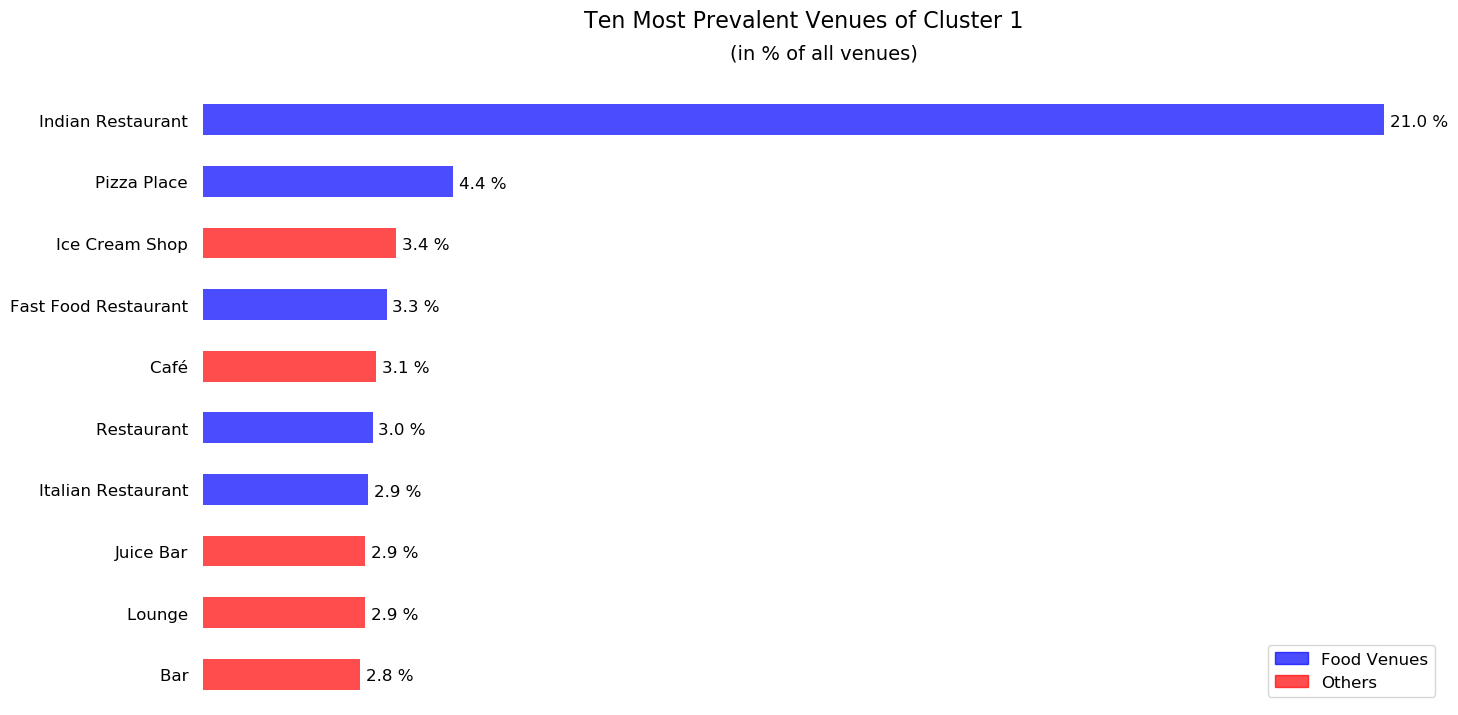

In [33]:
cluster1=pd.DataFrame(chn_results.iloc[0,0:-1]).transpose()
cluster1.sort_values(by='Cluster1',axis=1,ascending=False,inplace=True)
display(cluster1)

clus1=cluster1.iloc[0,9::-1]
generate_plot(clus1,1)

#### cluster 2

,Bus Station,South Indian Restaurant,Department Store,Indian Restaurant,Clothing Store,Vegetarian / Vegan Restaurant,Flower Shop,Train Station,Asian Restaurant,Antique Shop,Shoe Store,Miscellaneous Shop,Chinese Restaurant,Juice Bar,Fish Market,Movie Theater,Jewelry Store,Cosmetics Shop,Fast Food Restaurant,Rock Club,Bakery,Ice Cream Shop,Café,Women's Store,Market,Italian Restaurant,Grocery Store,Hotel,Convenience Store,Fabric Shop,Food,Middle Eastern Restaurant,Pharmacy,Pool Hall,Hotel Bar,Bus Line,Gym / Fitness Center,Snack Place,Bistro,American Restaurant,New American Restaurant,Beach,Ramen Restaurant,Road,Pizza Place,Restaurant,Sandwich Place,North Indian Restaurant,Nightclub,Thai Restaurant,Sculpture Garden,Accessories Store,Multiplex,Metro Station,Arcade,Bar,Bookstore,Breakfast Spot,Burger Joint,Coffee Shop,Dessert Shop,Diner,Electronics Store,Gift Shop,Gourmet Shop,Gym,Japanese Restaurant,Kerala Restaurant,Light Rail Station,Lounge,Men's Store,Yoga Studio
Cluster2,0.089286,0.084921,0.083333,0.075397,0.071032,0.061508,0.055556,0.051587,0.047222,0.041667,0.033333,0.033333,0.027778,0.02381,0.02381,0.02381,0.02381,0.02381,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,6.938894e-18,3.469447e-18,3.469447e-18,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,8.673617e-19,8.673617e-19,4.336809e-19,4.336809e-19,4.336809e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


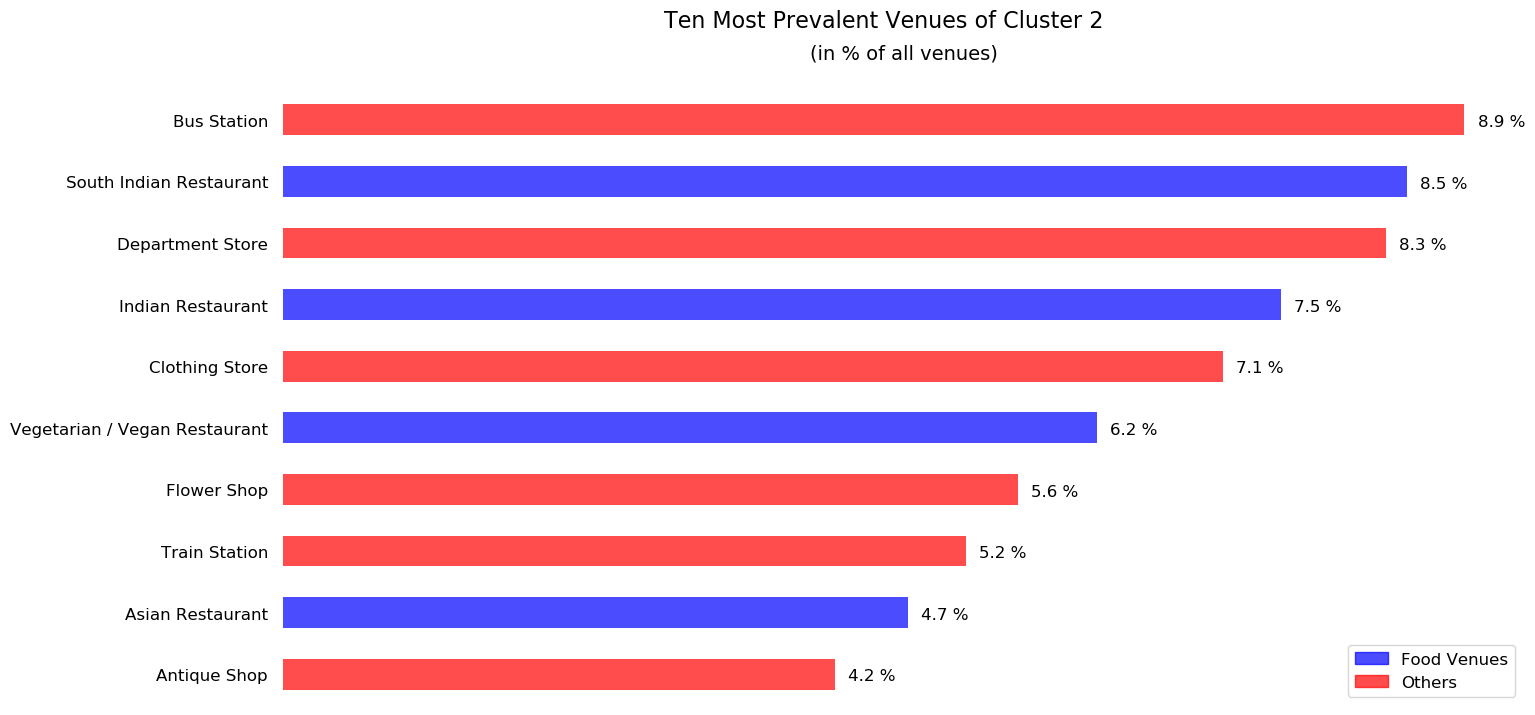

In [34]:
cluster2=pd.DataFrame(chn_results.iloc[1,0:-1]).transpose()
cluster2.sort_values(by='Cluster2',axis=1,ascending=False,inplace=True)
display(cluster2)

clus2=cluster2.iloc[0,9::-1]
generate_plot(clus2,2)

#### Cluster 3

,Convenience Store,Fabric Shop,Fast Food Restaurant,North Indian Restaurant,New American Restaurant,Multiplex,Movie Theater,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station,Men's Store,Market,Lounge,Light Rail Station,Kerala Restaurant,Juice Bar,Jewelry Store,Nightclub,Accessories Store,Italian Restaurant,Pharmacy,Women's Store,Vegetarian / Vegan Restaurant,Train Station,Thai Restaurant,South Indian Restaurant,Snack Place,Shoe Store,Sculpture Garden,Sandwich Place,Rock Club,Road,Restaurant,Ramen Restaurant,Pool Hall,Pizza Place,Japanese Restaurant,Ice Cream Shop,Indian Restaurant,Bookstore,Chinese Restaurant,Café,Bus Station,Bus Line,Burger Joint,Breakfast Spot,Bistro,American Restaurant,Beach,Bar,Bakery,Asian Restaurant,Arcade,Antique Shop,Clothing Store,Coffee Shop,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fish Market,Flower Shop,Food,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hotel,Hotel Bar,Yoga Studio
Cluster3,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


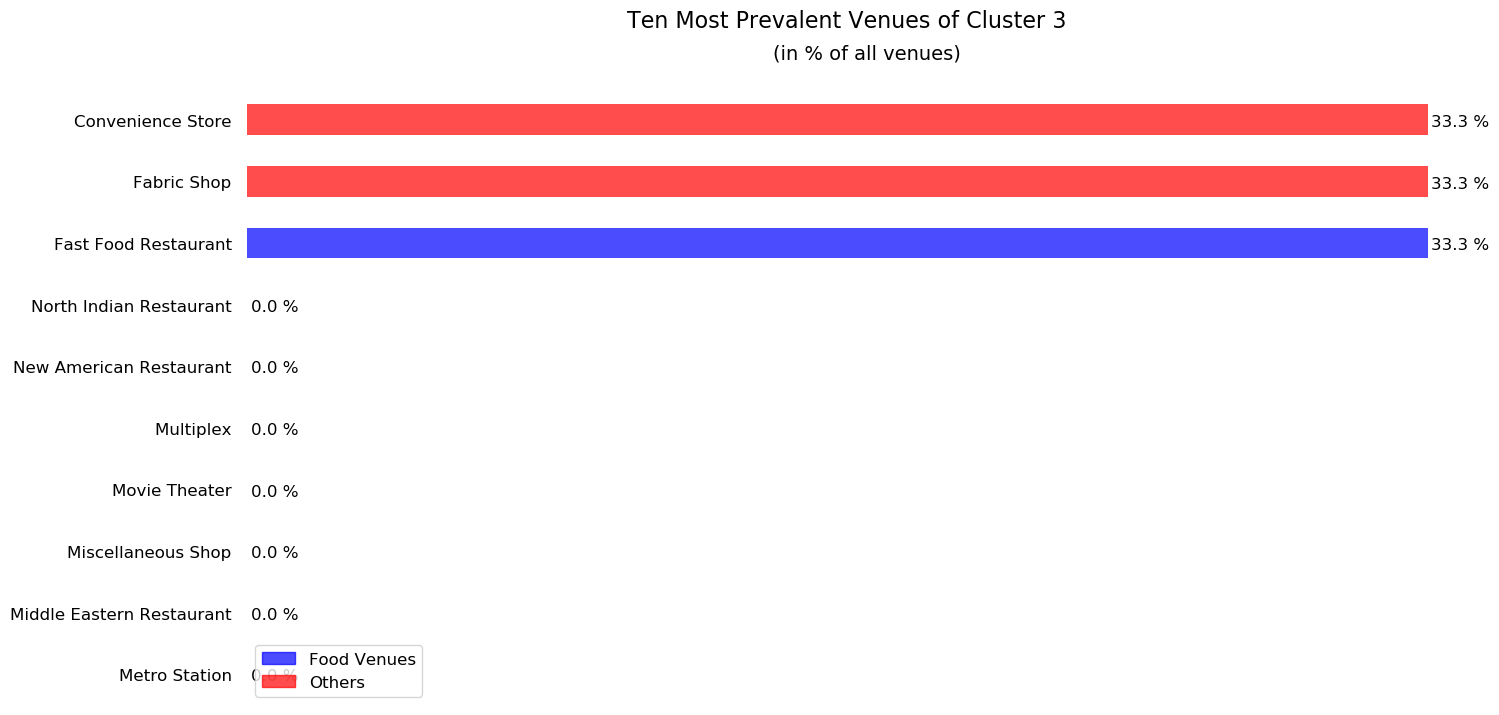

In [35]:
cluster3=pd.DataFrame(chn_results.iloc[2,0:-1]).transpose()
cluster3.sort_values(by='Cluster3',axis=1,ascending=False,inplace=True)
display(cluster3)

clus3=cluster3.iloc[0,9::-1]
generate_plot(clus3,3)

#### cluster 4

,Indian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Fish Market,Hotel Bar,Market,Movie Theater,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station,Men's Store,Light Rail Station,Lounge,New American Restaurant,Kerala Restaurant,Juice Bar,Jewelry Store,Japanese Restaurant,Multiplex,Accessories Store,Italian Restaurant,North Indian Restaurant,Women's Store,Train Station,Thai Restaurant,South Indian Restaurant,Snack Place,Shoe Store,Sculpture Garden,Sandwich Place,Rock Club,Road,Restaurant,Ramen Restaurant,Pool Hall,Pizza Place,Pharmacy,Nightclub,Ice Cream Shop,American Restaurant,Clothing Store,Antique Shop,Arcade,Asian Restaurant,Bakery,Bar,Beach,Bistro,Bookstore,Breakfast Spot,Burger Joint,Bus Line,Bus Station,Café,Chinese Restaurant,Coffee Shop,Gym / Fitness Center,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant,Flower Shop,Food,Gift Shop,Gourmet Shop,Grocery Store,Gym,Yoga Studio
Cluster4,0.375,0.25,0.125,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


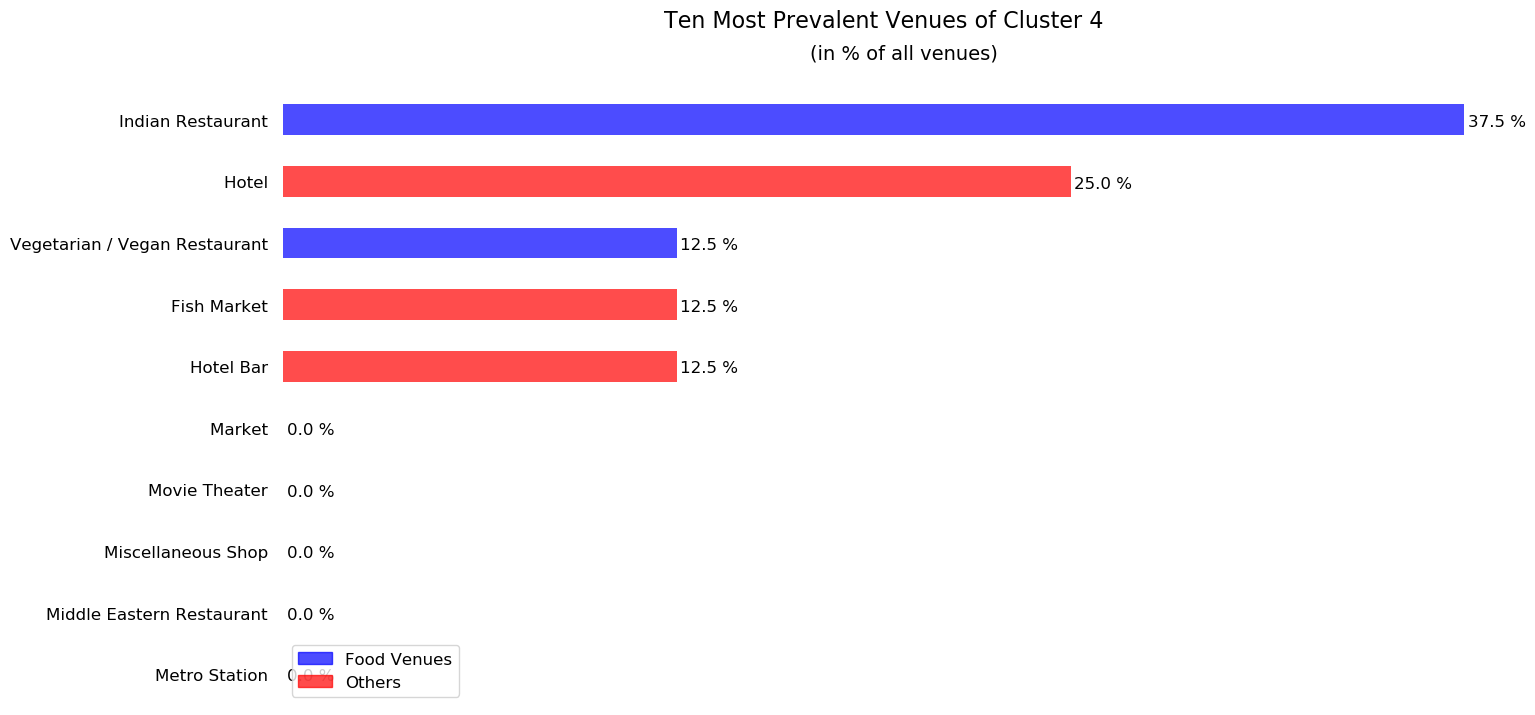

In [36]:
cluster4=pd.DataFrame(chn_results.iloc[3,0:-1]).transpose()
cluster4.sort_values(by='Cluster4',axis=1,ascending=False,inplace=True)
display(cluster4)

clus4=cluster4.iloc[0,9::-1]
generate_plot(clus4,4)

#### cluster 5

,Pharmacy,Coffee Shop,Pizza Place,Grocery Store,Men's Store,Multiplex,Movie Theater,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station,Market,Nightclub,Lounge,Light Rail Station,Kerala Restaurant,Juice Bar,Jewelry Store,Japanese Restaurant,New American Restaurant,Accessories Store,North Indian Restaurant,Shoe Store,Women's Store,Vegetarian / Vegan Restaurant,Train Station,Thai Restaurant,South Indian Restaurant,Snack Place,Sculpture Garden,Indian Restaurant,Sandwich Place,Rock Club,Road,Restaurant,Ramen Restaurant,Pool Hall,Italian Restaurant,Ice Cream Shop,American Restaurant,Bookstore,Chinese Restaurant,Café,Bus Station,Bus Line,Burger Joint,Breakfast Spot,Bistro,Hotel Bar,Beach,Bar,Bakery,Asian Restaurant,Arcade,Antique Shop,Clothing Store,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fabric Shop,Fast Food Restaurant,Fish Market,Flower Shop,Food,Gift Shop,Gourmet Shop,Gym,Gym / Fitness Center,Hotel,Yoga Studio
Cluster5,0.25,0.25,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


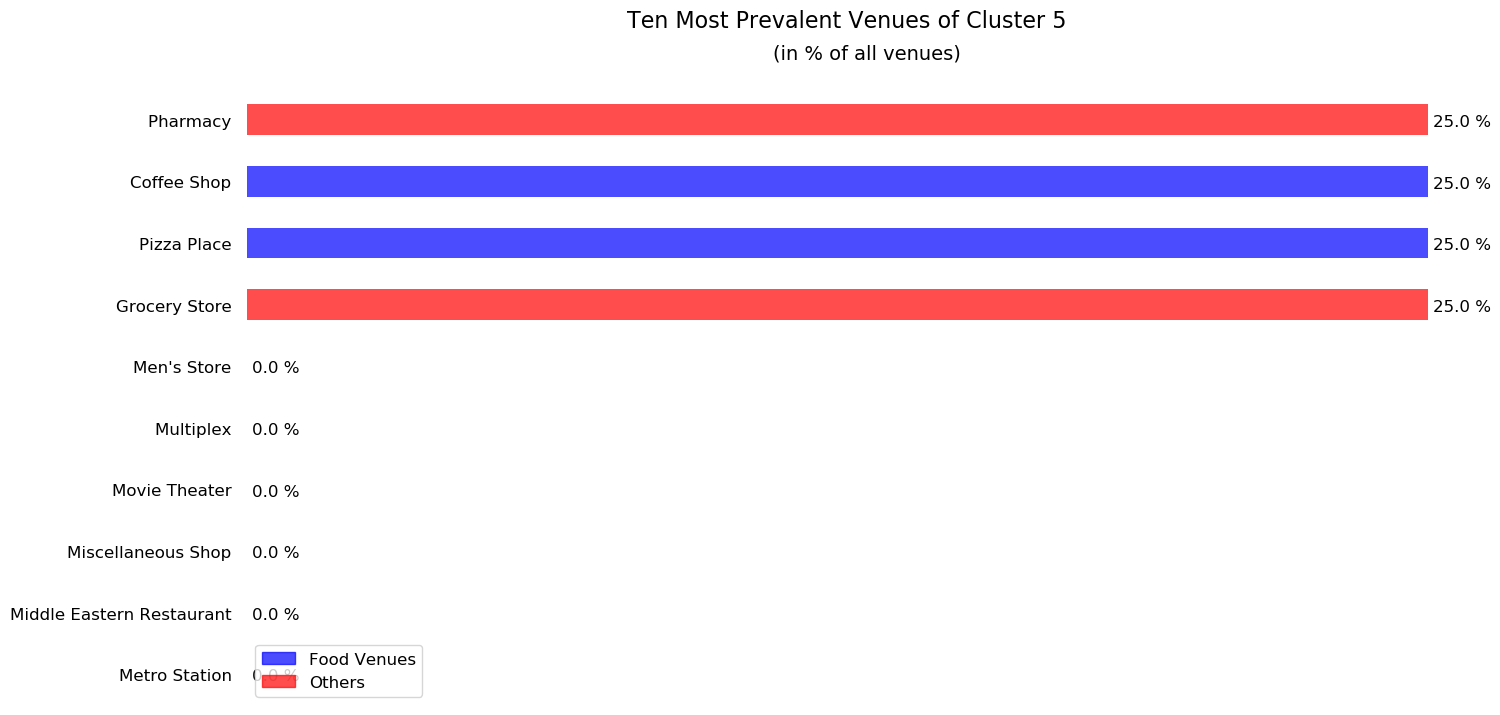

In [37]:
cluster5=pd.DataFrame(chn_results.iloc[4,0:-1]).transpose()
cluster5.sort_values(by='Cluster5',axis=1,ascending=False,inplace=True)
display(cluster5)

clus5=cluster5.iloc[0,9::-1]
generate_plot(clus5,5)

From the bar plots of different clusters, it is obvious that neighborhoods belonging to cluster 1 should be the better place for setting up an Indian restaurant. In that, Ashok Nagar will be the best option since that neighborhood contains theatres and metro station. 